In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

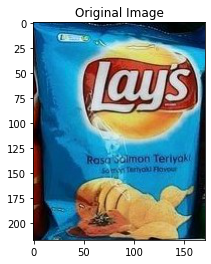

In [2]:
lays_image = cv2.imread(r'C:\Users\DELL\Desktop\python project\open cv2\New folder (18)\blue.jpg')
plt.imshow(cv2.cvtColor(lays_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

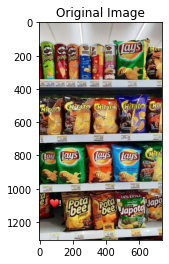

In [3]:
snack_image = cv2.imread(r'C:\Users\DELL\Desktop\python project\open cv2\New folder (18)\lays.jpg')
plt.imshow(cv2.cvtColor(snack_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

### ORB Discriptor :

ORB (Oriented FAST and Rotated BRIEF) descriptor is a feature descriptor used in computer vision that combines the FAST keypoint detector with the BRIEF descriptor. It is known for its efficiency, binary representation, and ability to handle rotations in images, making it suitable for tasks like keypoint matching and object recognition.

 I utilize the OpenCV library in Python to perform feature matching between two images employing the ORB (Oriented FAST and Rotated BRIEF) descriptor. I start by initializing an ORB object, which is responsible for configuring the feature detector and descriptor extractor.

 I detect keypoints and calculate descriptors for the first image, referred to as 'lays_image,' and the second image, named 'snack_image.' These keypoints represent distinctive and significant points within the images, while the descriptors encode the local image information around each keypoint, providing a numerical representation.
 
  I establish a Brute-Force Matcher (BFMatcher) and specify Hamming distance as the matching metric, with an added condition to return only mutual matches (crossCheck=True). The BFMatcher is then employed to identify matches between the descriptors of both images.
  
   I generate a visual representation of the top 25 matches by drawing lines that connect the corresponding keypoints on both images. This visualization, stored in the 'image_matches' variable, serves as a valuable tool for evaluating how effectively the keypoints in 'lays_image' align with those in 'snack_image,' making it particularly useful for tasks such as image alignment, object recognition, or image stitching.

In [4]:
orb = cv2.ORB_create()

# keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(lays_image,None)
kp2, des2 = orb.detectAndCompute(snack_image,None)

# BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

image_matches = cv2.drawMatches(lays_image, kp1, snack_image, kp2, matches[:25], None, flags=2)

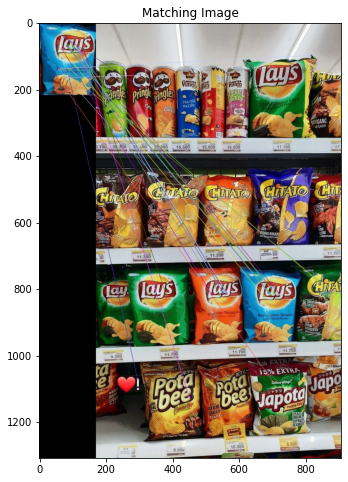

True

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_matches, cv2.COLOR_BGR2RGB))
plt.title("Matching Image")
plt.show()
cv2.imwrite('ORB_discriptor.png', image_matches)